# Modeling

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style('whitegrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

## Read CSV file

In [2]:
df1 = pd.read_csv('bridge_data_cleaned1')
df1.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [3]:
df2 = pd.read_csv('bridge_data_cleaned2')
df2.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Minnesota,L9347,8,8,0,N,3,114,83.0,9,...,0,0.0,32.2,24.0,25.9,5.0,5.0,7.0,40,5
1,Minnesota,L9903,N,N,N,N,3,112,83.0,9,...,0,0.0,11.5,0.0,0.0,NaN,NaN,NaN,28,3
2,Minnesota,96781,N,N,N,N,3,96,111.0,7,...,0,30.0,11.8,0.0,0.0,NaN,NaN,NaN,450,4
3,Minnesota,34J05,N,N,N,N,3,111,89.0,9,...,0,4.0,12.1,0.0,0.0,NaN,NaN,NaN,48,40
4,Minnesota,17508,8,6,0,N,3,112,83.0,9,...,0,0.0,44.9,20.3,21.7,8.0,7.0,7.0,20,6


In [4]:
df3 = pd.read_csv('bridge_data_cleaned3')
df3.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Pennsylvania,000000000018583,1,6,2,0,3,117,59.0,2,...,0,1.0,21.0,49.2,52.5,6.0,6.0,6.0,12394,10
1,Pennsylvania,000000000041175,1,1,0,1,3,117,70.0,1,...,0,35.0,240.2,52.2,55.1,8.0,7.0,7.0,12189,15
2,Pennsylvania,000000000041176,1,1,0,1,3,117,70.0,1,...,0,34.0,226.0,51.8,54.8,8.0,7.0,7.0,12744,14
3,Pennsylvania,000000000004028,1,3,0,1,3,104,48.0,1,...,2004,0.0,32.2,40.0,43.6,8.0,6.0,6.0,8169,34
4,Pennsylvania,000000000009312,N,N,N,N,3,117,70.0,1,...,0,56.0,37.1,0.0,0.0,NaN,NaN,NaN,11792,39


In [5]:
df = pd.concat([df1, df2, df3])
df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [6]:
df.shape

(592756, 38)

In [33]:
grouped = df.groupby('state')
grouped.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188660,Connecticut,05526,9,6,1,1,3.0,79,25.0,19.0,...,1987,0.0,34.1,21.3,24.6,6.0,6.0,6.0,1030,7
188661,Connecticut,01011,1,6,2,0,3.0,79,25.0,17.0,...,0,0.0,24.0,32.2,37.7,7.0,6.0,8.0,5500,3
188662,Connecticut,01812,1,6,2,0,3.0,79,25.0,11.0,...,0,34.0,63.6,42.0,47.6,5.0,7.0,7.0,14250,10
188663,Connecticut,01813,1,6,2,0,3.0,79,25.0,11.0,...,0,34.0,63.6,38.1,43.6,5.0,7.0,6.0,14250,10


In [93]:
sns.set_style('darkgrid')

Text(0, 0.5, 'Number of Bridges')

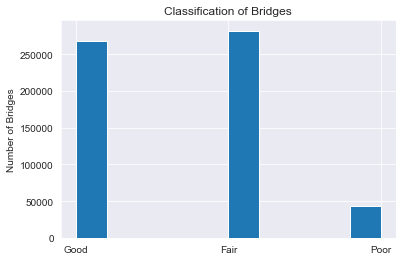

In [94]:
#plot number of wells according to functionality
plt.hist(df['bridge_condition']);
plt.title('Classification of Bridges')
plt.ylabel('Number of Bridges')

In [95]:
df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

<AxesSubplot:xlabel='wearing_type', ylabel='bridge_condition'>

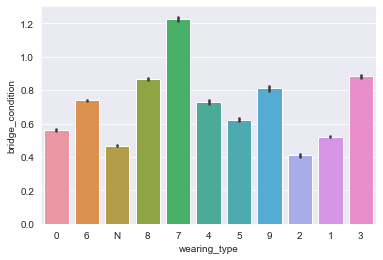

In [99]:

sns.barplot(y='bridge_condition', x='wearing_type', data=df2)

In [102]:

sns.barplot(y='bridge_condition', x='avg_daily_trfic', data=df2)

KeyboardInterrupt: 

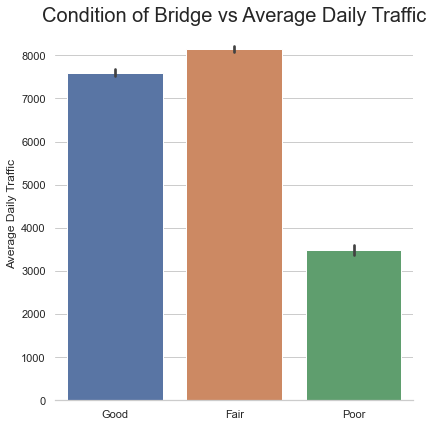

In [114]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y="avg_daily_trfic",
     height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Daily Traffic")
plt.title("Condition of Bridge vs Average Daily Traffic", fontsize=20);

Text(0.5, 0, 'Bridge Condition')

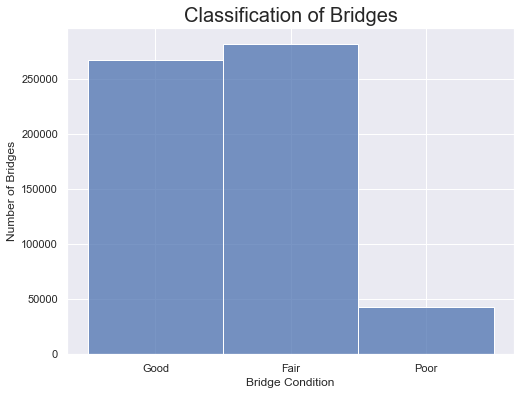

In [137]:
#plot number of wells according to functionality
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.histplot(df['bridge_condition'], bins='auto');
plt.title('Classification of Bridges', fontsize=20)
plt.ylabel('Number of Bridges')
plt.xlabel('Bridge Condition')

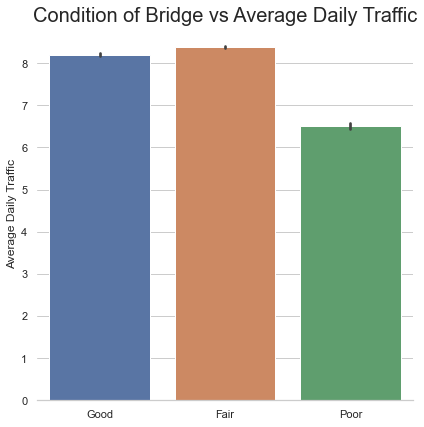

In [124]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y='avg_truck_trfc',
     height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Daily Traffic")
plt.title("Condition of Bridge vs Average Daily Traffic", fontsize=20);

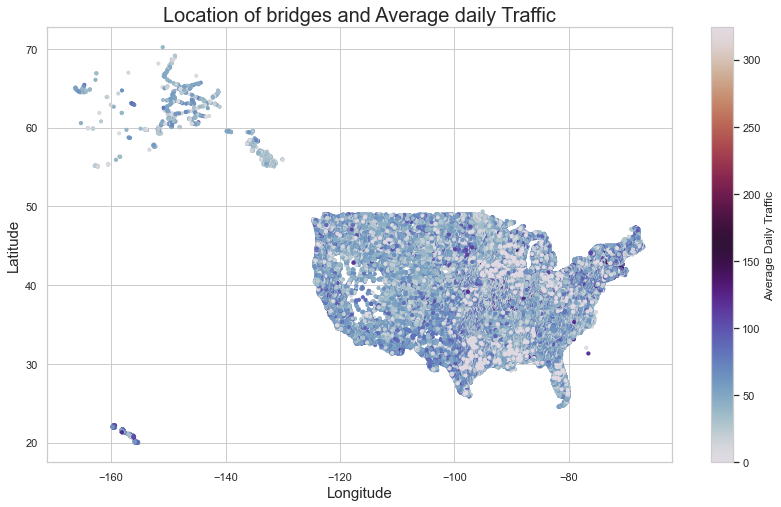

In [129]:
# plot wells on map with respect to water point height
plt.figure(figsize=(14,8))

plt.scatter(x='longitude', y='latitude', c='bridge_age' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('Average Daily Traffic')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of bridges and Average daily Traffic', fontsize=20)

plt.show()


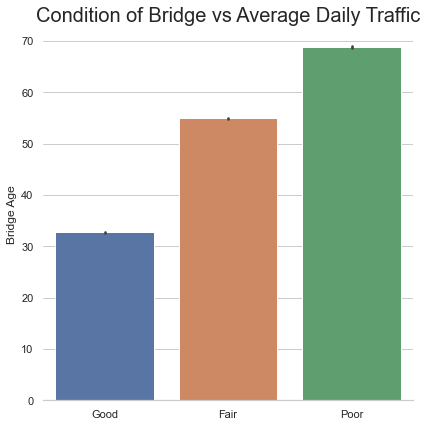

In [133]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y='bridge_age',
     height=6
)
g.despine(left=True)
g.set_axis_labels('','Bridge Age')
plt.title("Condition of Bridge vs Average Daily Traffic", fontsize=20);

In [135]:
df.bridge_age.value_counts()

61     12253
56     11774
51     11518
53      9369
58      8934
       ...  
220        1
214        1
212        1
162        1
324        1
Name: bridge_age, Length: 215, dtype: int64

In [170]:
states = df['state'].unique()
states

array(['  Alabama', '  Delaware', '  District of Columbia', '  Florida',
       '  Georgia', '  Hawaii', '  Idaho', '  Illinois', '  Indiana',
       '  Iowa', '  Alaska', '  Kansas', '  Kentucky', '  Louisiana',
       '  Maine', '  Maryland', '  Massachusetts', '  Michigan',
       '  Minnesota', '  Mississippi', '  Missouri', 'Missouri',
       '  Montana', '  Nebraska', '  Nevada', '  New Hampshire',
       '  New Jersey', '  New Mexico', '  New York', '  North Carolina',
       '  North Dakota', '  Ohio', '  Arizona', '  Oklahoma', '  Oregon',
       '  Pennsylvania', '  Rhode Island', '  South Carolina',
       '  South Dakota', '  Tennessee', '  Texas', '  Utah', '  Arkansas',
       '  Vermont', '  Virginia', '  Washington', '  West Virginia',
       '  Wisconsin', '  Wyoming', '  California', ' California',
       '  Colorado', '  Connecticut'], dtype=object)

In [184]:
#create a dictionary for each State
st = {}
for state in states:
    state_df = df.groupby('state').get_group(state).sort_index()['bridge_condition'].value_counts(normalize=True)
    st[state] = state_df

In [185]:
st

{'  Alabama': Fair    0.550587
 Good    0.410988
 Poor    0.038425
 Name: bridge_condition, dtype: float64,
 '  Delaware': Fair    0.651807
 Good    0.331325
 Poor    0.016867
 Name: bridge_condition, dtype: float64,
 '  District of Columbia': Fair    0.716129
 Good    0.232258
 Poor    0.051613
 Name: bridge_condition, dtype: float64,
 '  Florida': Good    0.652191
 Fair    0.317079
 Poor    0.030729
 Name: bridge_condition, dtype: float64,
 '  Georgia': Good    0.620842
 Fair    0.353710
 Poor    0.025448
 Name: bridge_condition, dtype: float64,
 '  Hawaii': Fair    0.735079
 Good    0.194764
 Poor    0.070157
 Name: bridge_condition, dtype: float64,
 '  Idaho': Fair    0.648389
 Good    0.288048
 Poor    0.063563
 Name: bridge_condition, dtype: float64,
 '  Illinois': Good    0.482482
 Fair    0.428107
 Poor    0.089411
 Name: bridge_condition, dtype: float64,
 '  Indiana': Fair    0.538553
 Good    0.402916
 Poor    0.058531
 Name: bridge_condition, dtype: float64,
 '  Iowa': Fair 

In [188]:
st.keys()

dict_keys(['  Alabama', '  Delaware', '  District of Columbia', '  Florida', '  Georgia', '  Hawaii', '  Idaho', '  Illinois', '  Indiana', '  Iowa', '  Alaska', '  Kansas', '  Kentucky', '  Louisiana', '  Maine', '  Maryland', '  Massachusetts', '  Michigan', '  Minnesota', '  Mississippi', '  Missouri', 'Missouri', '  Montana', '  Nebraska', '  Nevada', '  New Hampshire', '  New Jersey', '  New Mexico', '  New York', '  North Carolina', '  North Dakota', '  Ohio', '  Arizona', '  Oklahoma', '  Oregon', '  Pennsylvania', '  Rhode Island', '  South Carolina', '  South Dakota', '  Tennessee', '  Texas', '  Utah', '  Arkansas', '  Vermont', '  Virginia', '  Washington', '  West Virginia', '  Wisconsin', '  Wyoming', '  California', ' California', '  Colorado', '  Connecticut'])

In [182]:
for state in st:
    print(state[1].values())

AttributeError: 'str' object has no attribute 'values'

In [178]:
st['  Alabama'].values

array([0.55058749, 0.41098762, 0.0384249 ])

In [163]:
# data_dict = {"a": 1, "b": 2, "c": 3}
data_items = st.items()
data_list = list(data_items)

state_df = pd.DataFrame(data_list)
state_df.head()

,0,1
0,Alabama,0 Good 1 Fair 2 Good 3 ...
1,Delaware,15745 Good 15746 Fair 15747 Fair 1574...
2,District of Columbia,16575 Good 16576 Fair 16577 Fair 1657...
3,Florida,16730 Good 16731 Good 16732 Good 1673...
4,Georgia,29096 Fair 29097 Good 29098 Good 2909...


'  Alabama'

In [ ]:
df.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="construction_design_value", y="bridge_age", data=df,
            label="bridge_condition", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="abbrev", y="alcohol", data=df,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
# diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="freeze_thaw_cycle", hue="super_st_condition",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
# diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="snowfall_days", hue="super_st_condition",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="structure_length", y="bridge_width", hue="bridge_condition",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [ ]:
df.columns

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
# df = sns.load_dataset("penguins")
sns.displot(
    df, x="avg_truck_trfc", col="bridge_age", row="bridge_condition",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## Creating Dummies

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
# df['sub_st_condition'] = df.sub_st_condition.astype('str')
# df['super_st_condition'] = df.super_st_condition.astype('str')
# df['deck_condition'] = df.deck_condition.astype('str')
# df['mnt_respons'] = df.mnt_respons.astype('str')
df['toll'] = df.toll.astype('str')

In [ ]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material','super_st_condition',
               'sub_st_condition']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans']

to_drop = ['state', 'str_id', 'deck_condition', 'mnt_respons']

In [ ]:
df.info()

In [ ]:
# print number of classes in each category
for col in categorical:
    print(col, df[col].value_counts().count())

In [ ]:
df.drop(to_drop+target+continuous, axis=1).columns

In [ ]:
df_dummies = pd.get_dummies(df.drop(to_drop+target, axis=1))
df_dummies.head()

In [ ]:
df_dummies.shape

In [ ]:
df_dummies.info()

In [ ]:
df.num_spans.value_counts().count()

In [ ]:
df_dummies['bridge_condition'] = df['bridge_condition']

In [ ]:
df_dummies.head()

In [ ]:
df_dummies.bridge_condition.value_counts(normalize=True)

In [ ]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [ ]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# KNN

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

In [ ]:
X_train

## Baseline model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

## Confusion Matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardizing 

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

## GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [ ]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

In [ ]:
print(classification_report(y_test, knn_smote.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

In [ ]:
print(classification_report(y_train, forest.predict(X_train)))

In [ ]:
print(classification_report(y_test, forest.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(forest, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Standardizing

In [ ]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier()
# Fit the classifier
forest.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, forest)
metrics['name'] = 'Random forest scaled'
models.append(metrics)

## GridSearch CV

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Rand2om Forest tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random Forest tuned1')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_smote.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

## Feature Importance

In [ ]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb.predict(X_train))

In [ ]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

### Standardized

In [ ]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

### Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Instantiate XGBClassifier and fit classifier

# xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
#                           subsample=0.7)

xgb_tuned = XGBClassifier(objective = objective='multi:softmax', num_class = 3,
                          n_estimators = 200, learning_rate = .1, max_depth = 10, subsample =0.7)


xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)



In [ ]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test)))

# Replace target variable classes for visualization

In [97]:
# Replace target values - there are three classes
df2 = df.replace({'bridge_condition': {'Poor' : 2, 
                                'Fair' : 1, 
                                'Good' : 0}})
# Check to see that it worked
df2.iloc[15:20]

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
15,Alabama,013329,N,N,N,N,3.0,14,0.0,6.0,...,0,30.0,13.8,0.0,0.0,NaN,NaN,NaN,1820,9
16,Alabama,009759,N,6,0,0,3.0,14,0.0,8.0,...,0,0.0,12.1,0.0,0.0,NaN,NaN,NaN,295,15
17,Alabama,017064,2,0,0,0,3.0,14,0.0,7.0,...,0,0.0,34.1,28.5,30.8,7.0,6.0,7.0,775,30
18,Alabama,019836,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,34.1,27.9,27.9,8.0,8.0,8.0,95,0
19,Alabama,006867,N,6,0,0,3.0,14,0.0,8.0,...,0,0.0,14.1,0.0,0.0,NaN,NaN,NaN,250,7


In [8]:
df2.shape

(592756, 38)

# Folium Heatmap

In [9]:
import folium
from folium.plugins import HeatMap

In [10]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m

## By state

In [79]:
data = df2.groupby('state').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data

[[33.10078, -86.73788, 1.0],
 [59.44058, -143.5963, 1.0],
 [33.4656, -111.8803, 0.0],
 [35.047259999999994, -92.46783, 1.0],
 [36.75455, -120.2087, 0.0],
 [39.59688, -104.96555000000001, 1.0],
 [41.547574999999995, -72.829515, 1.0],
 [39.495025, -75.58209, 1.0],
 [38.89227, -77.0123, 1.0],
 [28.097705, -81.73315500000001, 0.0],
 [33.256820000000005, -83.90822, 0.0],
 [21.34625, -157.8547, 1.0],
 [43.725170000000006, -115.30425, 1.0],
 [40.20565, -88.98392, 1.0],
 [39.841629999999995, -86.22824999999999, 1.0],
 [42.03548, -93.30979, 1.0],
 [38.5375, -97.24078, 0.0],
 [37.53889, -85.01527, 1.0],
 [30.8242, -92.1362, 1.0],
 [44.48111, -69.85784, 1.0],
 [39.29555, -76.82200999999998, 1.0],
 [42.32037, -71.44185, 1.0],
 [42.91239, -84.39364, 1.0],
 [44.89703, -93.97028, 0.0],
 [32.70944, -89.52905, 0.0],
 [38.70211, -92.847235, 1.0],
 [46.868945, -111.2556, 1.0],
 [41.1198, -97.5007, 0.0],
 [36.66074, -115.2626, 1.0],
 [43.38619, -71.63842000000001, 0.0],
 [40.57264, -74.46401, 1.0],
 [35.1

In [80]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}
HeatMap(data = data).add_to(m)

In [81]:
display(m)

## By Sub-structure condition

In [82]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [15]:

data1 = df2.groupby('sub_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [16]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data1).add_to(m)
display(m)

## By snowfall days

In [17]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [18]:

data2 = df2.groupby('snowfall_days').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data2

[[30.81525, -90.9198, 0.0],
 [32.71175, -95.51144, 0.0],
 [33.01422, -93.85991, 1.0],
 [34.09958, -84.40154, 0.0],
 [33.806045, -92.33647500000001, 1.0],
 [33.21925, -96.67408, 1.0],
 [34.739055, -83.205245, 1.0],
 [34.157685, -92.15238, 1.0],
 [34.496230000000004, -89.98381499999999, 1.0],
 [35.2489, -89.05008500000001, 1.0],
 [35.74039, -82.17408499999999, 1.0],
 [34.69527, -95.30958, 1.0],
 [36.5909, -79.4095, 1.0],
 [35.850105, -86.98658499999999, 1.0],
 [35.659585, -86.54159, 1.0],
 [36.52417, -87.59483, 1.0],
 [36.66052, -86.85858, 1.0],
 [35.43073, -95.95705, 1.0],
 [37.589625, -86.79764, 1.0],
 [36.08979, -95.61946499999999, 1.0],
 [36.76089, -95.94744499999999, 1.0],
 [36.000455, -93.4646, 1.0],
 [38.08543, -87.58839, 1.0],
 [37.33333, -99.14954, 1.0],
 [36.21252, -89.68290999999998, 1.0],
 [38.02805, -86.3869, 1.0],
 [36.62914000000001, -85.333745, 1.0],
 [36.7107, -97.3004, 1.0],
 [37.04388, -89.28664, 1.0],
 [37.38908, -84.01389, 1.0],
 [37.976115, -87.035955, 1.0],
 [38.25

In [19]:
# gradient = {0: 'red', 1.0: 'brown', 2.0: 'green'}

HeatMap(data = data2).add_to(m)
display(m)

## By age of bridge

In [20]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [21]:

data3 = df2.groupby('bridge_age').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [22]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data3).add_to(m)
display(m)

## By Freeze and thaw cycle

In [23]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [24]:

data4 = df2.groupby('freeze_thaw_cycle').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [25]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data4).add_to(m)
display(m)

## By Super structure condition

In [26]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [27]:

data5 = df2.groupby('super_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data5

[[39.3292, -93.41373, 2.0],
 [40.265985, -83.49901000000001, 2.0],
 [38.65, -90.6217, 2.0],
 [40.33672, -88.518445, 2.0],
 [39.85921, -86.92074000000002, 2.0],
 [39.553, -88.17093, 1.0],
 [39.08619, -90.03333, 1.0],
 [38.342095, -91.17092, 0.0],
 [39.24333, -89.45774, 0.0],
 [40.463335, -84.202155, 0.0]]

In [28]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data5).add_to(m)
display(m)

## By County

In [29]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [30]:

data6 = df2.groupby('county').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data6

[[34.21805, -82.41122, 1.0],
 [30.27167, -92.3857, 1.0],
 [37.855385, -75.64924500000001, 1.0],
 [43.59711, -116.314, 0.0],
 [40.218, -94.25587, 1.0],
 [39.986955, -94.607315, 1.0],
 [44.026650000000004, -73.09123499999998, 0.0],
 [33.56474, -81.78218000000001, 1.0],
 [46.592995, -93.52061499999999, 0.0],
 [29.68806, -82.36417, 0.0],
 [36.06099, -79.41264, 1.0],
 [37.701065, -122.0759, 1.0],
 [37.46965, -105.9711, 1.0],
 [42.56663, -73.93361999999998, 1.0],
 [38.032385, -78.55462, 1.0],
 [44.595615, -83.44292, 0.0],
 [34.90889, -88.55666, 0.0],
 [55.15021, -162.32565, 1.0],
 [36.01977, -81.31896499999999, 1.0],
 [38.808425, -77.07518999999999, 1.0],
 [36.69573, -98.37769, 1.0],
 [46.36834, -86.91603, 1.0],
 [43.28354, -91.41158, 1.0],
 [42.623835, -85.878815, 1.0],
 [42.15399, -78.15523, 1.0],
 [37.71391, -80.09692, 1.0],
 [40.45199, -79.97688000000002, 1.0],
 [40.876795, -85.04037, 1.0],
 [30.66811, -92.8324, 0.0],
 [33.01227, -81.29087, 1.0],
 [45.062394999999995, -83.58622, 1.0],
 [

In [31]:

HeatMap(data = data6).add_to(m)
display(m)

## By New York Counties

In [76]:
ny_df = df.loc[df['state']=='  New York']
ny_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
80027,New York,000000002230679,1,2,0,1,3.0,80,31.0,11.0,...,2004,7.0,98.1,120.7,146.0,9.0,8.0,8.0,150322,7
80028,New York,000000002243440,N,1,0,N,3.0,78,16.0,14.0,...,1988,1.0,31.8,69.9,92.2,6.0,7.0,6.0,19421,8
80029,New York,000000005500039,1,2,0,1,3.0,80,31.0,12.0,...,0,40.0,88.9,82.7,88.9,7.0,6.0,7.0,117547,4
80030,New York,000000003358490,N,1,0,N,3.0,80,31.0,19.0,...,0,21.0,9.8,0.0,0.0,NaN,NaN,NaN,22857,3
80031,New York,000000002230680,1,2,0,1,3.0,80,31.0,11.0,...,0,18.0,230.0,107.9,113.8,7.0,8.0,7.0,150322,15


In [78]:
ny_df.shape

(15505, 38)

In [77]:
ny_df.bridge_condition.value_counts(normalize=True)

Fair    0.531893
Good    0.368784
Poor    0.099323
Name: bridge_condition, dtype: float64

In [ ]:
New York has 15,505 bridges out of which 

In [65]:
# Replace target values - there are three classes
ny_df = ny_df.replace({'bridge_condition': {'Poor' : 2, 
                                'Fair' : 1, 
                                'Good' : 0}})


In [73]:
# ny_df_grouped = ny_df.groupby('county').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
ny_df_grouped = ny_df[['latitude', 'longitude', 'bridge_condition']].values.tolist()
ny_df_grouped

[[40.75241, -73.89771, 0.0],
 [40.62864, -73.96584, 1.0],
 [40.90263, -73.81498, 1.0],
 [41.03113, -73.74497, 0.0],
 [40.75414, -73.89879, 0.0],
 [40.60522, -73.98053, 0.0],
 [40.99066, -73.76974, 0.0],
 [40.76642, -73.89393000000003, 1.0],
 [40.91157000000001, -73.81371, 1.0],
 [40.87543, -73.83485, 1.0],
 [40.64142, -73.96396999999997, 0.0],
 [40.75774000000001, -73.89998, 0.0],
 [40.98507, -73.77543, 2.0],
 [40.92156, -73.81081, 1.0],
 [40.64435, -73.96452, 2.0],
 [41.03164, -73.7505, 0.0],
 [40.94407, -73.8019, 0.0],
 [40.82508, -73.86761, 1.0],
 [40.65422, -73.96179000000002, 2.0],
 [41.03258, -73.75478000000003, 0.0],
 [40.92273, -73.81588, 1.0],
 [41.12436, -73.70391, 1.0],
 [40.95324, -73.80014, 0.0],
 [41.0353, -73.75478000000003, 0.0],
 [40.66068, -73.96200999999998, 0.0],
 [41.38466, -73.55937, 0.0],
 [41.0373, -73.75494, 1.0],
 [40.62634, -73.98226, 0.0],
 [40.59592, -74.00005, 1.0],
 [40.62614, -73.98347, 0.0],
 [40.67108, -73.95895, 1.0],
 [41.16195, -73.68909000000002, 1

In [74]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [75]:

HeatMap(data = ny_df_grouped).add_to(m)
display(m)